# **Seminar 2 - Natural Language Processing**
*Naumov Anton (Any0019)*

*To contact me in telegram: @any0019*

## 1. Понимание рекуррентных архитектур

### 1.1 Recurrent Neural Network (RNN)

<img src=https://research.aimultiple.com/wp-content/uploads/2021/08/rnn-text.gif alt="RNN" width="50%"/>

$$ H^{(t)} = \tanh \Big( W^{h x} \cdot X^{(t)} + W^{h h} \cdot H^{(t-1)} + b_{h} \Big) $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.2 Long-Short Term Memory (LSTM)

<img src=https://cdn-images-1.medium.com/max/950/1*76Mikf2yo1Q3U76hp17v9Q.gif alt="LSTM" width="70%"/>

$$ \text{input:} \quad i^{(t)} = \sigma \Big( W^{i x} \cdot X^{(t)} + W^{i h} \cdot H^{(t-1)} + b_{i} \Big) $$
$$ \text{output:} \quad o^{(t)} = \sigma \Big( W^{h x} \cdot X^{(t)} + W^{o h} \cdot H^{(t-1)} + b_{o} \Big) $$
$$ \text{forget:} \quad f^{(t)} = \sigma \Big( W^{h x} \cdot X^{(t)} + W^{f h} \cdot H^{(t-1)} + b_{f} \Big) $$
$$ \tilde{H}^{(t)} = \tanh \Big( W^{g x} \cdot X^{(t)} + W^{g h} \cdot H^{(t-1)} + b_{g} \Big) $$
$$ C^{(t)} = \tilde{H}^{(t)} \odot i^{(t)} + C^{(t-1)} \odot f^{(t)} $$
$$ H^{(t)} = \tanh \Big( C^{(t)} \Big) \odot o^{(t)} $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.3 Gated Recurrent Unit (GRU)

<img src=https://vbystricky.github.io/images/2021-05/gru.svg alt="LSTM" width="55%"/>

$$ \text{update:} \quad z^{(t)} = \sigma \Big( W^{z x} \cdot X^{(t)} + W^{z h} \cdot H^{(t-1)} + b_{i} \Big) $$
$$ \text{reset:} \quad r^{(t)} = \sigma \Big( W^{r x} \cdot X^{(t)} + W^{r h} \cdot H^{(t-1)} + b_{r} \Big) $$
$$ \tilde{H}^{(t)} = \tanh \Big(  W^{\tilde{h} x} \cdot X^{(t)} + W^{\tilde{h} h} \cdot \big( r^{(t)} \odot H^{(t-1)} \big) + b_{\tilde{h}} \Big) $$
$$ H^{(t)} = (1 - z^{(t)}) \odot H^{(t - 1)} + z^{(t)} \odot \tilde{H}^{(t)} $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.4 Как получить предсказание? Какие бывают задачи?

**Sequence to sequence (seq2seq):**

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_seq.svg alt="tags" width="55%"/>

К примеру, определение частей речи в предложении

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_seq_v2.svg alt="seq2seq" width="55%"/>

К примеру, автоматический перевод

**Sequence to one:**

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_one.svg alt="one class" width="55%"/>

К примеру, предсказание оценки, соответствующей данному ревью фильма

**One to sequence:**

<img src=https://vbystricky.github.io/images/2021-05/rnn_one_to_seq.svg alt="sequence" width="55%"/>

К примеру, составление текстового описания по чему-нибудь

## 2. Задача классификации текста

### 2.1 Скачиваем данные

In [1]:
#!g1.1
# For datasphere
%pip install torchtext torchdata

# For google collab
# !pip install torchtext torchdata

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [182]:
#!g1.1
# # Apparently there is a problem with this code in DataSphere...

# from torchtext import datasets
# from IPython.display import clear_output
# import os
# import time
# from datetime import timedelta

# download_dir = './datasets'

# all_datasets = [
#     'AG_NEWS',
#     'DBpedia',
#     'YelpReviewPolarity',
#     'YelpReviewFull',
#     'YahooAnswers',
#     'AmazonReviewPolarity',
#     'AmazonReviewFull'
# ]

# data = {'train': {}, 'test': {}}
# download_time = dict()
# for i, dataset_name in enumerate(all_datasets):
#     clear_output(True)
    
#     start_time = time.monotonic()
    
#     print(f'{i+1}/{len(all_datasets)}: Downloading dataset {dataset_name}')
    
#     download_exec = f'data[\'train\'][dataset_name] = datasets.{dataset_name}(root=\'{os.path.join(download_dir, dataset_name)}\', split=\'train\')'
#     download_val_exec = f'data[\'test\'][dataset_name] = datasets.{dataset_name}(root=\'{os.path.join(download_dir, dataset_name)}\', split=\'test\')'
    
#     # NEVER REPEAT THIS AT HOME
#     exec(download_exec)
#     exec(download_val_exec)
#     download_time[dataset_name] = timedelta(seconds=time.monotonic() - start_time)
    
#     for split in ['train', 'test']:
#         data[split][dataset_name] = [(l, t) for (l, t) in data[split][dataset_name]]
    

# clear_output(True)
# print('Download time:')
# for k, v in download_time.items():
#     print('{: <20} ~ {}'.format(k, v))

In [189]:
#!g1.1
# If in DataSphere use this then
from IPython.display import clear_output
import os
import time
from datetime import timedelta

import pandas as pd

df_folder = "./datasets/AG_NEWS/AG_NEWS"

df_train = pd.read_csv(os.path.join(df_folder, "train.csv"), header=None)
df_test = pd.read_csv(os.path.join(df_folder, "test.csv"), header=None)

all_datasets = ["AG_NEWS"]

data = {
    "train": {"AG_NEWS": list(map(lambda el: (el[0], el[1] + " " + el[2]), df_train.values.tolist()))},
    "test": {"AG_NEWS": list(map(lambda el: (el[0], el[1] + " " + el[2]), df_test.values.tolist()))},
}

del df_train, df_test

In [184]:
#!g1.1
data["test"]["AG_NEWS"][0]

(3,
 "Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.")

### 2.2 Посмотрим на данные

In [185]:
#!g1.1
# For datasphere
%pip install termcolor

# For google collab
# !pip install termcolor

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [157]:
#!g1.1
from termcolor import colored

show_each = 5
num_classes = {}

for dataset_name in data['train']:
    num_classes[dataset_name] = len(set([label for (label, _) in data['train'][dataset_name]]))
    
    train_size = len(data['train'][dataset_name])
    test_size = len(data['test'][dataset_name])
    print(colored(dataset_name + f' ~ {train_size} train examples' +
                  f' and {test_size} test examples' +
                  f' with {num_classes[dataset_name]} classes:\n',
                  'red', attrs=['bold', 'underline']))
    
    for i in range(0, train_size, train_size//show_each):
        label, text = data['train'][dataset_name][i]
        print(f'  ' + colored(f'ind', attrs=['bold', 'underline']) +
              f' ~ {i}:\n  ' + colored(f'label', attrs=['bold', 'underline']) +
              f' ~ {label}\n  ' + colored(f'text', attrs=['bold', 'underline']) +
              f' ~ {text}\n')
    print('\n============\n')

AG_NEWS ~ 120000 train examples and 7600 test examples with 4 classes:

  ind ~ 0:
  label ~ 3
  text ~ Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

  ind ~ 24000:
  label ~ 3
  text ~ Spectrum-FDA OKs Generic Version of Cipro (Reuters) Reuters - Spectrum Pharmaceuticals  said\on Friday U.S. regulators have approved its generic version of\Bayer's   Cipro antibiotic, triggering a  #36;750,000\equity investment by one of its partners.

  ind ~ 48000:
  label ~ 4
  text ~ Rolling towards history One of the ironies of Wednesdays flight of SpaceShipOne is that those who had the worst view of the flightand the drama that unfolded during the ascentwere the members of the media who came to report on the event.

  ind ~ 72000:
  label ~ 1
  text ~ Iran Hints at Agreeing to Enrichment Freeze (Reuters) Reuters - Iran's top security official suggested\on Monday Tehran may agree to extend its freeze

### 2.3 Готовим данные

Очень много разных подходов:

- стоп-слова
- токенизация
- лемматизация
- стемминг
- обучаемые эмбеддинги
- лингвистические модели
- ...

In [187]:
#!g1.1
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
        
splits = ['train', 'test']

# Creating tokenizer for english text
tokenizer = get_tokenizer('basic_english')

print(tokenizer("Some random text, another random text."))

['some', 'random', 'text', ',', 'another', 'random', 'text', '.']


In [190]:
#!g1.1
max_size = [0] * (len(all_datasets) * len(splits))

# Building vocabs
def yield_tokens(it_list):
    global max_size
    for i, it in enumerate(tqdm(it_list)):
        for _, text in it:
            tokens = tokenizer(text)
            max_size[i] = max(max_size[i], len(tokens))
            yield tokens


def flat_list(list_):
    res = []
    for el in list_:
        res.extend(el)
    return res


vocab = {}
print('Building vocabs:')
vocab = build_vocab_from_iterator(
    yield_tokens(
        flat_list(
            [
                [data[split][dataset_name] for dataset_name in all_datasets]
                for split
                in splits
            ]
        )
    ),
    specials=["<unk>", "<pad>"]
)
vocab.set_default_index(vocab["<unk>"])

Building vocabs:



In [232]:
#!g1.1
"w@rd" in vocab, "text" in vocab

(False, True)

In [233]:
#!g1.1
len(vocab)

98636

In [238]:
#!g1.1
vocab.get_itos()[:10]

['<unk>', '<pad>', '.', 'the', ',', 'to', 'a', 'of', 'in', 'and']

In [191]:
#!g1.1
unk_id = vocab['<unk>']
pad_id = vocab['<pad>']
print(f'<unk> ~ {unk_id}\n<pad> ~ {pad_id}')

<unk> ~ 0
<pad> ~ 1


In [192]:
#!g1.1
text = 'Some random text, that I want to tokenize <pad> <pad> <pad> and one unrecognizable w@rd'
print(f'tokenized:\n---- {tokenizer(text)}\n')
print(f'indexes from vocab:\n---- {vocab(tokenizer(text))}')

tokenized:
---- ['some', 'random', 'text', ',', 'that', 'i', 'want', 'to', 'tokenize', '<pad>', '<pad>', '<pad>', 'and', 'one', 'unrecognizable', 'w@rd']

indexes from vocab:
---- [123, 10223, 4004, 4, 18, 282, 915, 5, 0, 1, 1, 1, 9, 62, 95829, 0]


In [100]:
#!g1.1
import numpy as np

max_size = np.array(max_size).reshape(2, -1)
for i, dataset_name in enumerate(all_datasets):
    print(f'{dataset_name} ~ max_size: {max_size[:,i]}')

AG_NEWS ~ max_size: [207 161]
DBpedia ~ max_size: [1498  602]
YelpReviewPolarity ~ max_size: [1261 1259]
YelpReviewFull ~ max_size: [1261 1180]
YahooAnswers ~ max_size: [4014 4017]
AmazonReviewPolarity ~ max_size: [597 660]
AmazonReviewFull ~ max_size: [597 344]


In [195]:
#!g1.1
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
chosen_dataset = 'AG_NEWS'
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

for i, dataset_name in enumerate(all_datasets):
    if dataset_name == chosen_dataset:
        max_ = max(max_size[:,i])
print(f'maximal text length ~ {max_}')

maximal text length ~ 207


In [197]:
#!g1.1
import torch

# Text and label preprocessing
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1


# Applying preprocessings with offsets to batch
def collate_batch_offsets(batch):
    """
    input: batch --> Iteratable (label, text)
    output:
        - label_list --> tensor<int> ~ len=bs, all labels from batch
        - text_list --> tensor<int>, all texts tokenized and merged in one list
        - offsets --> tensor<int> ~ len=bs+1, where does each individual text starts
    
    hint - tensor.cumsum(dim=?) --> cumulative sum across dim
    """
    label_list, text_list, offsets = [], [], [0]
    for (label, text) in batch:
        label_list.append(label_pipeline(label))
        processed_text = torch.tensor(text_pipeline(text),
                                      dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = torch.cat(text_list)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    return label_list, text_list, offsets


# Applying preprocessings with padding to batch
def collate_batch_padding(batch):
    """
    input: batch --> Iteratable (label, text)
    output:
        - label_list --> tensor<int> ~ len=bs, all labels from batch
        - text_list --> tensor<int> ~ len=(bs x seq_len), all texts tokenized and merged in matrix with paddings
    
    hint - use `max_` value (or may be calculate local max_seq_len)
    """
    label_list, text_list = [], []
    for (label, text) in batch:
        label_list.append(label_pipeline(label))
        text_list.append(text_pipeline(text))
    local_max_seq_len = max(map(len, text_list))
    text_list = [
        text + [pad_id] * (local_max_seq_len - len(text))
        for text
        in text_list
    ]
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = torch.tensor(text_list, dtype=torch.int64)
    return label_list, text_list

In [198]:
#!g1.1
# Making dataloaders
dataloaders_off = {split: {} for split in splits}
dataloaders_pad = {split: {} for split in splits}

print('Making dataloaders...')


# # For all downloaded datasets
# for split in splits:
#     print(f'---- for {split}')
#     for dataset_name in tqdm(all_datasets):
#         dataloaders_off[split][dataset_name] = DataLoader(
#             data[split][dataset_name],
#             batch_size=16,
#             shuffle=(split=='train'),
#             drop_last=(split=='train'),
#             collate_fn=collate_batch_offsets
#         )
#         dataloaders_pad[split][dataset_name] = DataLoader(
#             data[split][dataset_name],
#             batch_size=16,
#             shuffle=(split=='train'),
#             drop_last=(split=='train'),
#             collate_fn=collate_batch_padding
#         )


# Quicker, but only for your chosen dataset
for split in splits:
    dataloaders_off[split][chosen_dataset] = DataLoader(
        data[split][chosen_dataset],
        batch_size=16,
        shuffle=(split=='train'),
        drop_last=(split=='train'),
        collate_fn=collate_batch_offsets,
    )
    dataloaders_pad[split][chosen_dataset] = DataLoader(
        data[split][chosen_dataset],
        batch_size=16,
        shuffle=(split=='train'),
        drop_last=(split=='train'),
        collate_fn=collate_batch_padding,
    )


print("Done!")
    
# Freeing space for efficiency
del data

Making dataloaders...


In [202]:
#!g1.1
l_, t_, o_ = next(iter(dataloaders_off['train'][chosen_dataset]))
print(f'labels ~ {l_.shape}\n{l_}\n')
print(f'texts ~ {t_.shape}\n{t_}\n')
print(f'offsets ~ {o_.shape}\n{o_}')

labels ~ torch.Size([16])
tensor([1, 3, 2, 0, 2, 1, 2, 3, 1, 0, 1, 0, 3, 3, 0, 3])

texts ~ torch.Size([639])
tensor([ 7436,  1244,    17,    84, 10947,  2771,  4635,   322,     3, 77103,
         4657,     4,   131,     7,     3,   628,    17,    10,   138,     2,
         2337,     2,  1855,     2,  4367,  1399,   224,  2454,    62, 13025,
         6987,   165,   328,    81,   966,  2816,   310,   102,    31,  5840,
          966,  6062,   266,  1689,     5,   214,   310,   102,  4777, 11210,
           48,  2015,     5, 15410,     2,   221,     7, 10427,  1972,  1786,
          954,   148,     4,  5595,  5576,   325,  1470,   152,     4,  5109,
            2,     4,  1159,     2,   573,    54, 30982,   221,  5600,  7405,
           88,     2,    11,    56,  1866,  1786,    23,   954,   148,    12,
            3,   126,   100,     4,     6,   281,    18,  6803,   187,   449,
           25,    48,    73,  4006,   107,    11,  2076,    69,     3,    55,
           17,    10,  2715, 152

In [203]:
#!g1.1
l_, t_ = next(iter(dataloaders_pad['train'][chosen_dataset]))
print(f'labels ~ {l_.shape}\n{l_}\n')
print(f'texts ~ {t_.shape}\n{t_}\n')

labels ~ torch.Size([16])
tensor([3, 3, 0, 3, 2, 2, 2, 2, 1, 2, 1, 2, 0, 3, 2, 2])

texts ~ torch.Size([16, 72])
tensor([[17697,  5311,  3306,  ...,     1,     1,     1],
        [39677,    13,    10,  ...,     1,     1,     1],
        [19259,  6472,  5260,  ...,     1,     1,     1],
        ...,
        [  598,  1098,  1689,  ...,     1,     1,     1],
        [   61,     4,   715,  ...,  3731,   125,     2],
        [  353,    29,  2861,  ...,     1,     1,     1]])



### 2.4. GloVe эмбеддинги

Давайте скачаем предобученные glove вектора и инициализируем nn.Embedding ими, там где мы их знаем

In [214]:
#!g1.1:bash
wget -O glove.zip https://huggingface.co/stanfordnlp/glove/resolve/main/glove.840B.300d.zip

# mirror https://nlp.stanford.edu/data/wordvecs/glove.840B.300d.zip

^C


TypeError: cannot unpack non-iterable NoneType object

In [247]:
#!g1.1:bash
ls -sh

total 2.1G
   0 datasets
2.1G glove.zip
128K sem2_nlp_master.ipynb
140K sem2_nlp_master_fix.ipynb
 44K sem2_nlp_student.ipynb


In [248]:
#!g1.1:bash
unzip glove.zip

Archive:  glove.zip
  inflating: glove.840B.300d.txt     


In [251]:
#!g1.1
from tqdm import tqdm as tqdm_

np.random.seed(19)

# Открываем glove
def load_glove_weights(file_path, vocab):
    print("Loading Glove Weights")
    # Инициализируем веса для всех слов стандартным нормальным распределением
    glove_weights = np.random.uniform(0, 1, (len(vocab), 300))
    mask_found = np.zeros(len(vocab), dtype=bool)
    
    with open(file_path, 'r') as f:
        for line in tqdm_(f, total=2196018):
            line = line.split()
            token = ' '.join(line[:-300])
            embed = line[-300:]

            if token in vocab:
                ind = vocab[token]
                mask_found[ind] = True
                glove_weights[ind, :] = np.array(list(map(float, embed)), dtype=np.float)

    print(f"{mask_found.sum()} words from vocab of size {len(vocab)} loaded!")

    glove_weights[vocab['<pad>']] = np.zeros(300, dtype=np.float)
    return glove_weights, mask_found


glove_weights, mask_found = load_glove_weights('glove.840B.300d.txt', vocab)

100%|██████████| 2196018/2196018 [03:01<00:00, 12125.30it/s]


Loading Glove Weights
64291 words from vocab of size 98636 loaded!


## 3. Составляем модель и пайплайн обучения

### 3.1 Рекуррентная модель

In [272]:
#!g1.1
from torch import nn
from typing import Any

class RecurrentModel(nn.Module):
    """
        Network with recurrent block
    """
    def __init__(
        self,
        vocab_size: int,
        input_size: int,
        hidden_size: int,
        output_size: int,
        rnn_type: Any,
        num_layers: int,
        bidirectional: bool,
        dropout_p: float,
        use_glove: bool,
        freeze_glove: bool,
        reduce: str = 'last',
    ):
        super(RecurrentModel, self).__init__()
        self.rnn_type = rnn_type
        D = 2 if bidirectional else 1
        self.reduce = reduce
        
        rnn_types = [nn.RNN, nn.LSTM, nn.GRU]
        if rnn_type not in rnn_types:
            raise ValueError(f'rnn_cell should be one of {rnn_types}')
        
        reduce_ways = ['last', 'max', 'mean', 'sum']
        assert reduce in reduce_ways, print(f'reduce must be one of {reduce_ways}')
        
        self.embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=input_size)
        if use_glove is True:
            assert input_size == 300, (
                "loaded GloVe embeddings have size 300, change input_size to 300 or do not use GloVe"
            )
            self.embed.weight = nn.Parameter(
                torch.from_numpy(glove_weights),
                requires_grad = (not freeze_glove),
            )
        
        self.rnn_layers = rnn_type(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=bidirectional,
            dropout=dropout_p,
            batch_first=True,
        )
        
        self.to_class = nn.Linear(hidden_size * D, output_size)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
        
    def forward(self, texts):
        texts = self.embed(texts)
        
        if self.rnn_type == nn.LSTM:
            output, (hn, cn) = self.rnn_layers(texts)
        else:
            output, hn = self.rnn_layers(texts)
        
        if self.reduce == 'last':
            output = output[:, -1, :]
        elif self.reduce == 'mean':
            output = output.mean(1)
        elif self.reduce == 'max':
            output = output.max(1)
        elif self.reduce == 'sum':
            output = output.sum(1)
        
        return self.logsoftmax(self.to_class(output))

In [280]:
#!g1.1
hashing_trick_size = None

if hashing_trick_size == None:
    hashing_trick_size = len(vocab)

model_rnn = RecurrentModel(
    vocab_size = hashing_trick_size,
    input_size = 300,
    hidden_size = 100,
    output_size = num_classes[chosen_dataset],
    rnn_type = nn.RNN,
    num_layers = 3,
    bidirectional = True,
    dropout_p = 0.3,
    reduce = 'mean',
    use_glove = True,
    freeze_glove = True,
).float()

print('Model:', model_rnn, sep='\n')

labels_batch, texts_batch = next(iter(dataloaders_pad['train'][chosen_dataset]))

print(f'\nInput shape: {texts_batch.shape}')
out = model_rnn(texts_batch % hashing_trick_size)
print(f'Output shape: {out.shape}')

print(f'\nChecking that returned probabilities (all sums must be close to 1)',
      out.exp().sum(-1).detach().numpy(), sep='\n')

Model:
RecurrentModel(
  (embed): Embedding(98636, 300)
  (rnn_layers): RNN(300, 100, num_layers=3, batch_first=True, dropout=0.3, bidirectional=True)
  (to_class): Linear(in_features=200, out_features=4, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

Input shape: torch.Size([16, 59])
Output shape: torch.Size([16, 4])

Checking that returned probabilities (all sums must be close to 1)
[1.         1.0000001  0.9999999  0.9999999  0.99999994 1.
 1.         1.         0.99999994 1.         1.0000001  1.
 1.         1.         1.         1.0000001 ]


In [281]:
#!g1.1
# Counting how many parameters does our model have
def model_num_params(model):
    sum_params = 0
    sum_learnable_params = 0
    for param in model.named_parameters():
        num_params = np.prod(param[1].shape)
        print(
            '{: <31} ~  {: <8} params ~ grad: {}'.format(
                param[0],
                num_params,
                param[1].requires_grad,
            )
        )
        sum_params += num_params
        if param[1].requires_grad:
            sum_learnable_params += num_params
    print(
        f'\nIn total:\n  - {sum_params} params\n  - {sum_learnable_params} learnable params'
    )
    return sum_params

sum_params = model_num_params(model_rnn)

embed.weight                    ~  29590800 params ~ grad: False
rnn_layers.weight_ih_l0         ~  30000    params ~ grad: True
rnn_layers.weight_hh_l0         ~  10000    params ~ grad: True
rnn_layers.bias_ih_l0           ~  100      params ~ grad: True
rnn_layers.bias_hh_l0           ~  100      params ~ grad: True
rnn_layers.weight_ih_l0_reverse ~  30000    params ~ grad: True
rnn_layers.weight_hh_l0_reverse ~  10000    params ~ grad: True
rnn_layers.bias_ih_l0_reverse   ~  100      params ~ grad: True
rnn_layers.bias_hh_l0_reverse   ~  100      params ~ grad: True
rnn_layers.weight_ih_l1         ~  20000    params ~ grad: True
rnn_layers.weight_hh_l1         ~  10000    params ~ grad: True
rnn_layers.bias_ih_l1           ~  100      params ~ grad: True
rnn_layers.bias_hh_l1           ~  100      params ~ grad: True
rnn_layers.weight_ih_l1_reverse ~  20000    params ~ grad: True
rnn_layers.weight_hh_l1_reverse ~  10000    params ~ grad: True
rnn_layers.bias_ih_l1_reverse   ~  100 

In [282]:
#!g1.1
del model_rnn

In [283]:
#!g1.1
model_lstm = RecurrentModel(
    vocab_size = hashing_trick_size,
    input_size = 300,
    hidden_size = 100,
    output_size = num_classes[chosen_dataset],
    rnn_type = nn.LSTM,
    num_layers = 3,
    bidirectional = False,
    dropout_p = 0.3,
    reduce = 'last',
    use_glove = True,
    freeze_glove = True,
).float()

print('Model:', model_lstm, sep='\n')

labels_batch, texts_batch = next(iter(dataloaders_pad['train'][chosen_dataset]))

print(f'\nInput shape: {texts_batch.shape}')
out = model_lstm(texts_batch % hashing_trick_size)
print(f'Output shape: {out.shape}')

print(f'\nChecking that returned probabilities (all sums must be close to 1)',
      out.exp().sum(-1).detach().numpy(), sep='\n')

Model:
RecurrentModel(
  (embed): Embedding(98636, 300)
  (rnn_layers): LSTM(300, 100, num_layers=3, batch_first=True, dropout=0.3)
  (to_class): Linear(in_features=100, out_features=4, bias=True)
  (logsoftmax): LogSoftmax(dim=1)
)

Input shape: torch.Size([16, 56])
Output shape: torch.Size([16, 4])

Checking that returned probabilities (all sums must be close to 1)
[0.99999994 0.9999999  1.0000001  1.0000001  1.         1.
 0.99999994 1.         1.         0.99999994 1.0000001  1.
 1.         1.0000001  1.         1.        ]


In [284]:
#!g1.1
sum_params = model_num_params(model_lstm)

embed.weight                    ~  29590800 params ~ grad: False
rnn_layers.weight_ih_l0         ~  120000   params ~ grad: True
rnn_layers.weight_hh_l0         ~  40000    params ~ grad: True
rnn_layers.bias_ih_l0           ~  400      params ~ grad: True
rnn_layers.bias_hh_l0           ~  400      params ~ grad: True
rnn_layers.weight_ih_l1         ~  40000    params ~ grad: True
rnn_layers.weight_hh_l1         ~  40000    params ~ grad: True
rnn_layers.bias_ih_l1           ~  400      params ~ grad: True
rnn_layers.bias_hh_l1           ~  400      params ~ grad: True
rnn_layers.weight_ih_l2         ~  40000    params ~ grad: True
rnn_layers.weight_hh_l2         ~  40000    params ~ grad: True
rnn_layers.bias_ih_l2           ~  400      params ~ grad: True
rnn_layers.bias_hh_l2           ~  400      params ~ grad: True
to_class.weight                 ~  400      params ~ grad: True
to_class.bias                   ~  4        params ~ grad: True

In total:
  - 29913604 params
  - 3228

In [285]:
#!g1.1
del model_lstm

### 3.2 Оптимизатор

In [286]:
#!g1.1
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

def create_model_and_optimizer(model_class, model_params, lr=1e-3, beta1=0.9, beta2=0.999, device=device):
    model = model_class(**model_params).float()
    model = model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr, [beta1, beta2])
    return model, optimizer

In [287]:
#!g1.1
hashing_trick_size = None

model_params = {
    'vocab_size': hashing_trick_size if hashing_trick_size is not None else len(vocab),
    'input_size': 300,
    'hidden_size': 100,
    'output_size': num_classes[chosen_dataset],
    'rnn_type': nn.RNN,
    'num_layers': 3,
    'bidirectional': True,
    'dropout_p': 0.3,
    'reduce': 'mean',
    'use_glove': True,
    'freeze_glove': True,
}

model, optimizer = create_model_and_optimizer(
    model_class = RecurrentModel, 
    model_params = model_params,
    lr = 1e-3,
)

### 3.3 Обучение/валидация одной эпохи

In [293]:
#!g1.1
import torch.nn.functional as F
from tqdm.notebook import tqdm

criterion = nn.NLLLoss()

def train(model, optimizer, loader, criterion, ht=None):
    model.train()
    losses_tr = []
    for labels, texts in tqdm(loader):
        labels = labels.to(device)
        texts = texts.to(device)
        
        optimizer.zero_grad()
        out = model(texts % ht if ht is not None else texts)
        loss = criterion(out, labels)
        
        loss.backward()
        optimizer.step()
        losses_tr.append(loss.item()) 
    
    return model, optimizer, np.mean(losses_tr)

def val(model, loader, criterion, ht=None):
    model.eval()
    losses_val = []
    with torch.no_grad():
        for labels, texts in tqdm(loader):
            labels = labels.to(device)
            texts = texts.to(device)
            out = model(texts % ht if ht is not None else texts)
            loss = criterion(out, labels)

            losses_val.append(loss.item())
    
    return np.mean(losses_val)

### 3.4 Цикл обучения

In [294]:
#!g1.1
from IPython.display import clear_output
from tqdm.notebook import trange
import matplotlib.pyplot as plt
%matplotlib inline


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def learning_loop(
    model,
    optimizer,
    train_loader,
    val_loader,
    criterion,
    scheduler=None,
    min_lr=None,
    epochs=10,
    val_every=1,
    draw_every=1,
    separate_show=False,
    hashing_trick_size=None,
):
    losses = {'train': [], 'val': []}

    for epoch in range(1, epochs+1):
        print(f'#{epoch}/{epochs}:')
        model, optimizer, loss = train(
            model,
            optimizer,
            train_loader,
            criterion,
            hashing_trick_size,
        )
        losses['train'].append(loss)

        if not (epoch % val_every):
            loss = val(model, val_loader, criterion, hashing_trick_size)
            losses['val'].append(loss)
            if scheduler:
                scheduler.step(loss)

        if not (epoch % draw_every):
            clear_output(True)
            fig, ax = plt.subplots(1, 2 if separate_show else 1, figsize=(20, 10))
            fig.suptitle(f'#{epoch}/{epochs}:')

            if separate_show:
                plt.subplot(121)
                plt.title('loss on train')
            plt.plot(losses['train'], 'r.-', label='train')
            plt.legend()

            if separate_show:
                plt.subplot(122)
                plt.title('loss on validation')
            else:
                plt.title('losses')
            plt.plot(losses['val'], 'g.-', label='val')
            plt.legend()
            
            plt.show()
        
        if min_lr and get_lr(optimizer) <= min_lr:
            print(f'Learning process ended with early stop after epoch {epoch}')
            break
    
    return model, optimizer, losses

### 3.5 Обучаем модели

In [295]:
#!g1.1
model_params = dict()
model = dict()
optimizer = dict()
scheduler = dict()
criterion = dict()
losses = dict()

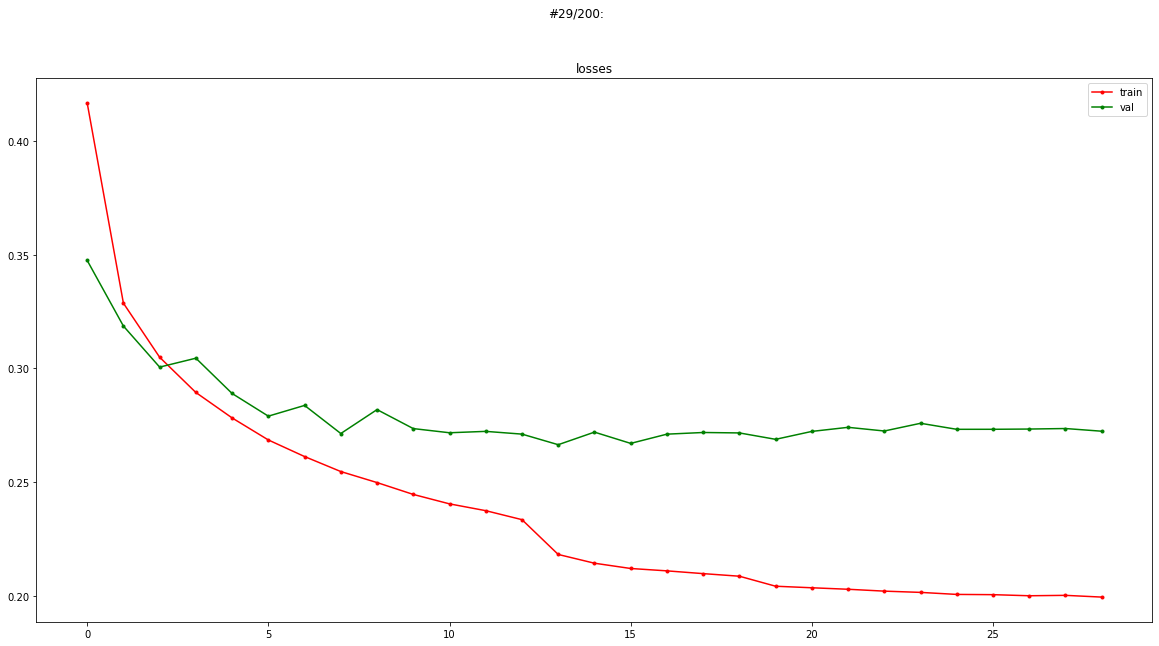

Learning process ended with early stop after epoch 29
CPU times: user 57min 6s, sys: 2min 55s, total: 1h 2s
Wall time: 58min 30s


In [296]:
#!g1.1
%%time

model_type = 'bi-rnn'

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

hashing_trick_size = None

model_params[model_type] = {
    'vocab_size': hashing_trick_size if hashing_trick_size is not None else len(vocab),
    'input_size': 300,
    'hidden_size': 20,
    'output_size': num_classes[chosen_dataset],
    'rnn_type': nn.RNN,
    'num_layers': 2,
    'bidirectional': True,
    'dropout_p': 0.3,
    'reduce': 'mean',
    'use_glove': True,
    'freeze_glove': True,
}

model[model_type], optimizer[model_type] = create_model_and_optimizer(
    model_class = RecurrentModel, 
    model_params = model_params[model_type],
    lr = 5e-4,
    device = device,
)

scheduler[model_type] = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer[model_type],
    mode='min',
    factor=0.25,
    patience=4,
    threshold=0.001,
    verbose=True
)

criterion[model_type] = nn.NLLLoss()

model[model_type], optimizer[model_type], losses[model_type] = learning_loop(
    model = model[model_type],
    optimizer = optimizer[model_type],
    train_loader = dataloaders_pad['train'][chosen_dataset],
    val_loader = dataloaders_pad['test'][chosen_dataset],
    criterion = criterion[model_type],
    scheduler = scheduler[model_type],
    epochs = 200,
    min_lr = 2e-6,
    hashing_trick_size = hashing_trick_size,
)

# if device != 'cpu':
#     model[model_type] = model[model_type].to('cpu')

In [167]:
#!g1.1
# %whos

### 3.6 Протестируем что получилось

In [308]:
#!g1.1
model_type = 'bi-rnn'

# for AG_NEWS for example ~ search for others labels if needed
true_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

def predict(text):
    processed_text = text_pipeline(text)
    processed_text = [processed_text + [pad_id] * (max_ - len(processed_text))]
    text_tensor = torch.tensor(processed_text, dtype=torch.int64)
    if hashing_trick_size is not None:
        text_tensor = text_tensor % hashing_trick_size

    with torch.no_grad():
        probs = model[model_type](text_tensor.to(device)).exp().detach().cpu().numpy()[0]
        print(f"Text:\n    '{text}'\n")
        for p, l in zip(probs, true_labels):
            print(f"{l} ~ {p}")
        
    return [(p, l) for p, l in zip(probs, true_labels)]

In [309]:
#!g1.1
import warnings
warnings.filterwarnings('ignore')

text = """Apple will release it's new Iphone this weekend! What a great news!"""

_ = predict(text)

Text:
    'Apple will release it's new Iphone this weekend! What a great news!'

World ~ 0.17128883302211761
Sports ~ 0.10878156870603561
Business ~ 0.25684645771980286
Sci/Tech ~ 0.4630831182003021


In [310]:
#!g1.1
text = """Today, at grand arena, lions ones again claimed victory over tigers and gained the title of the world champions!"""

_ = predict(text)

Text:
    'Today, at grand arena, lions ones again claimed victory over tigers and gained the title of the world champions!'

World ~ 0.11289855092763901
Sports ~ 0.7539350986480713
Business ~ 0.06165214255452156
Sci/Tech ~ 0.07151422649621964


In [335]:
#!g1.1
def real_confusion_matrix(model, val_loader, class_labels, use_probs=False, normalize=True):
    with torch.no_grad():
        n_classes = len(class_labels)
        conf_matrix = np.zeros((n_classes, n_classes))
        for i, (labels, texts) in enumerate(tqdm(val_loader)):
            probs = model(texts.to(device)).exp()
            if use_probs:
                for j in range(texts.shape[0]):
                    for c in range(n_classes):
                        conf_matrix[labels[j].item(), c] += probs[j,c]
            else:
                _, pred_classes = torch.max(probs, 1)
                for j in range(texts.shape[0]):
                    conf_matrix[labels[j].item(), pred_classes[j].item()] += 1.
        
        if normalize:
            conf_matrix /= conf_matrix.sum(1)
        
        fig = plt.figure(figsize=(18, 10))
        fig.suptitle(f'Confusion matrix (norm={normalize}, use_probs={use_probs})')
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_matrix)
        fig.colorbar(cax)
        
        @plt.FuncFormatter
        def fake_labels(x, pos):
            return class_labels[(int(x))] if x < len(class_labels) else "@"
        
        ax.xaxis.set_major_formatter(fake_labels)
        ax.set_xlabel('predicted class')
#         ax.xaxis.set_major_formatter("")
#         secax = ax.secondary_xaxis('top')
#         secax.xaxis.set_ticks(list(range(len(class_labels))))
#         secax.xaxis.set_ticklabels(class_labels)
#         secax.set_xlabel('predicted class')
        
        ax.yaxis.set_ticks(list(range(len(class_labels))))
        ax.yaxis.set_ticklabels(class_labels)
        ax.set_ylabel('true class')
        
        
        for x in range(conf_matrix.shape[0]):
            for y in range(conf_matrix.shape[1]):
                ax.text(x, y, round(conf_matrix[x,y], 4), va='center', ha='center')
        
        
        plt.show()
        
        return conf_matrix

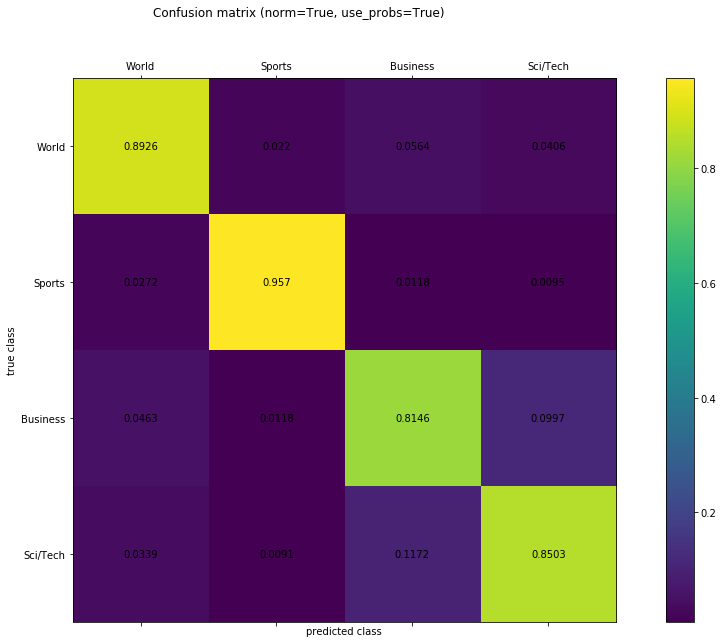

In [336]:
#!g1.1
pcm = real_confusion_matrix(
    model[model_type],
    dataloaders_pad["test"][chosen_dataset],
    true_labels,
    use_probs=True,
    normalize=True,
)

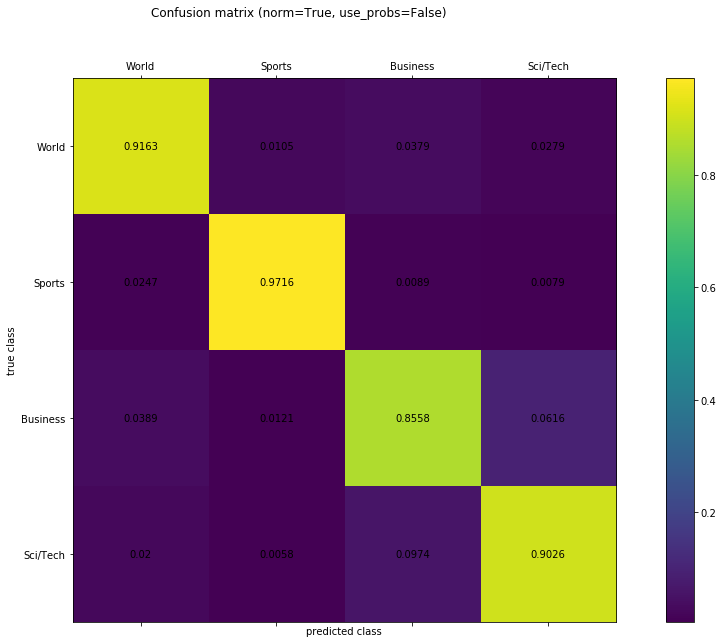

In [337]:
#!g1.1
pcm = real_confusion_matrix(
    model[model_type],
    dataloaders_pad["test"][chosen_dataset],
    true_labels,
    use_probs=False,
    normalize=True,
)

## 4. Эмбеддинги

### 4.1 Word2Vec

Идея алгоритма простая: обучим не рекуррентную нейросеть на нахождение связи между словом и контекстом, в котором оно встречается в корпусе.

Все тексты токенезируются, затем берётся окно фиксированного размера и для кажджого текста проводят обучение на каждой из возможных позиций центра и окна. Далее, внутреннее представление модели для данного слова в центре - и есть его эмбеддинг.

Есть два алгоритма, относящиеся к Word2Vec:

1. **CBow** (Continuous Bag of Words) - предсказания слова по контексту

<img src="https://amitness.com/images/nlp-ssl-center-word-prediction.gif" alt="CBow" width="90%"/>


2. **Skip-gram** - предсказание контекста по слову

<img src="https://amitness.com/images/nlp-ssl-neighbor-word-prediction.gif" alt="Skip-gram" width="90%"/>

<img src="https://img-blog.csdnimg.cn/20190903155003926.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2NoZW54aW52aGFpODk=,size_16,color_FFFFFF,t_70" alt="word2vec" width="95%"/>

**Плюсы:**
- Похожие по контексту слова оказываются похожди в пространстве эмбеддингов
- Смысловые зависимости между словами сохраняются при математических операциях
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/d61/30b/d45/d6130bd4502710631a8c812923230f47.png" alt="word2vec" width="80%"/>
<img src="https://amitness.com/images/word2vec-analogy.gif" alt="word2vec" width="80%"/>
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/a19/84b/fea/a1984bfeab5a597c6fb6300f7d694901.png" alt="word2vec" width="80%"/>

**Минусы:**
- Плохо справляется со словами вне словаря. К примеру, если в текстах корпуса встречались достаточно часто слова 'tensor' и 'flow', но не встречался 'tensorflow', то модель пометит последний как просто '\<unk\>'
- Никак не переиспользует параметры для слов с общими корнями (к пр. 'eat', 'eats', 'eaten', 'eater', 'eating') - для модели это просто разные слова и каждое из них учится отдельно из контекста, тогда как слова сильно завязаны по смыслу.

### 4.2 GloVe

**GloVe** (Global vectors) - нечто среднее между word2vec и SVD разложением.

Модель GloVe пытается решить проблему эффективного использования статистики совпадений. GloVe минимизирует разницу между произведением векторов слов и логарифмом вероятности их совместного появления с помощью SGD.

### 4.3 FastText

Идея алгоритма следующая: будем обучать word2vec, но не над словами, а над буквенными n-gram-ами

Берём каждое слово, добавляем к нему <...>, чтобы обозначать границы слова.

Дальше бьём каждое слово на n-gram-мы фиксированного размера.

<table>
<thead>
<tr><th>Слово</th><th>n-gram</th><th>Разбиение</th></tr>
</thead>
<tbody>
<tr><td>eating</td><td>3</td><td>&lt;ea, eat, ati, tin, ing, ng&gt;</td></tr>
<tr><td>eating</td><td>4</td><td>&lt;eat, eati, atin, ting, ing&gt;</td></tr>
<tr><td>eating</td><td>5</td><td>&lt;eati, eatin, ating, ting&gt;</td></tr>
<tr><td>eating</td><td>6</td><td>&lt;eatin, eating, ating&gt;</td></tr>
</tbody>
<\table>

Токенизируем (так же используем hashing trick, чтобы ограничить размер словаря).

<img src="https://amitness.com/images/fasttext-hashing-ngrams.png" alt="hashing_trick" width="80%"/>

Используем суммы всех эмбедингов токенов и слова целиком, чтобы получить эмбеддинг слова.

<img src="https://amitness.com/images/fasttext-center-word-embedding.png" alt="word embeddings" width="80%"/>

Обучаем на положительных и негативных примерах - негативные сэмплим случайно с вероятностью пропорциональной корню из вероятности слова. Для каждого положительного сэмплим 5 негативных.

<img src="https://amitness.com/images/fasttext-negative-sampling-goal.png" alt="negative sampling" width="80%"/>

Обучаем при помощи SGD

### 4.4 ELMo

**ELMo** (Embeddings from Language Model)

Вместо того, чтобы использовать фиксированные эмбеддинги слов, ELMo смотрит на целое предложение, прежде чем присвоить каждому слову его эмбеддинг. Она использует двунаправленную модель долгой краткосрочной памяти (bi-directional LSTM), обученную специально под задачу создания таких эмбеддингов.

### 4.5 And then you'll need attention

ELMo - первый подход к лингивтическому моделированию

Далее появляются архитектуры с механизмом внимания, но это уже совсем другая история...

(to be continued на курсе NLP)